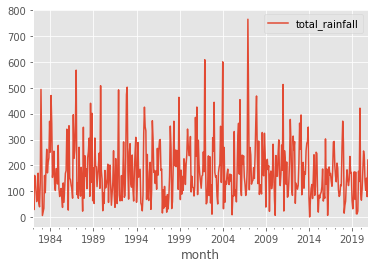

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

plt.style.use('ggplot')

rainfall = pd.read_csv('Datacamp CSV/rainfall-monthly-total.csv')

rainfall['month'] = pd.to_datetime(rainfall['month'])

rainfall.plot('month', 'total_rainfall')
plt.show()

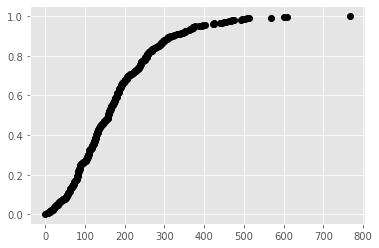

In [2]:
# Construct CDF
rainfall.sort_values('total_rainfall', ascending = False)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

x, y = ecdf(rainfall['total_rainfall'])

plt.plot(x, y, marker = 'o', color = 'black', linestyle = 'none')
plt.show()

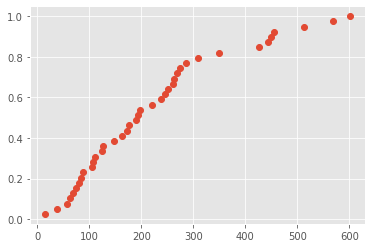

In [3]:
# Rainfall stats for January
rainfall[rainfall['month'].dt.month == 1].describe()

x_jan, y_jan = ecdf(rainfall[rainfall['month'].dt.month == 1]['total_rainfall'])

plt.plot(x_jan, y_jan, marker = 'o', linestyle = 'none')
plt.show()

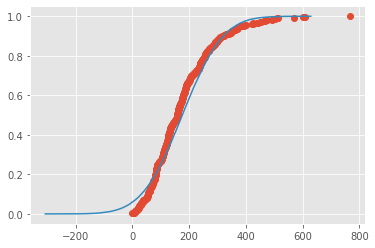

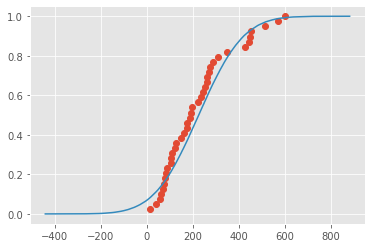

In [4]:
# Is the January dataset a normal distribution?
jan_rainfall = rainfall[rainfall['month'].dt.month == 1]

mu = jan_rainfall.mean()
sigma = jan_rainfall.std()

x_norm, y_norm = ecdf(np.random.normal(rainfall['total_rainfall'].mean(), 
                                       rainfall['total_rainfall'].std(), size = 100000))
x_norm_jan, y_norm_jan = ecdf(np.random.normal(mu, sigma, size = 100000))

# Change to x_jan, y_jan if you want to compare january
plt.figure()
plt.plot(x, y, marker = 'o', linestyle = 'none')
plt.plot(x_norm, y_norm)
plt.show()

# Not really a normal distribution
plt.figure()
plt.plot(x_jan, y_jan, marker = 'o', linestyle = 'none')
plt.plot(x_norm_jan, y_norm_jan)
plt.show()

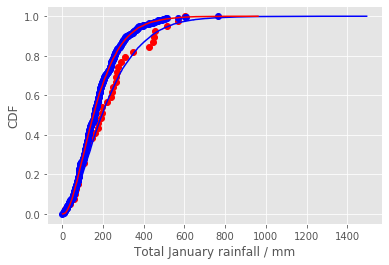

In [5]:
# Assuming that the rainfall is a Gamma distribution (non-negative), then numpy.gamma
# requires the shape and scale of the Gamma distribution.

# The shape of a gamma distribution is mean^2 / std^2, while the scale is std^2 / mean

x_gamma, y_gamma = ecdf(np.random.gamma(mu**2 / sigma**2, sigma**2 / mu, size = 10000))
x_gamma_year, y_gamma_year = ecdf(np.random.gamma(rainfall['total_rainfall'].mean()**2 / rainfall['total_rainfall'].std()**2, 
                          rainfall['total_rainfall'].std()**2 / rainfall['total_rainfall'].mean(), 
                          size = 10000))


# Actually a GAMMA distribution. Pretty sweet actually!
plt.figure()

# January ECDF
plt.plot(x_jan, y_jan, marker = 'o', linestyle = 'none', color = 'red')
plt.plot(x_gamma, y_gamma, color = 'blue')

# Total ECDF
plt.plot(x, y, marker = 'o', linestyle = 'none', color = 'blue')
plt.plot(x_gamma_year, y_gamma_year, color = 'red')


plt.xlabel('Total January rainfall / mm')
plt.ylabel('CDF')
plt.show()

In [6]:
# Chance of having this amount of rain for the whole of January
samples = np.random.gamma(mu**2 / sigma**2, sigma**2 / mu, size = 1000000)

current_rain = 350.6 + 201.8 + 6 + 13.8 + 31.6 + 10.8
probability = sum(samples >= current_rain) / 1000000
print('Probability of this much rain in January: {:.4f}'.format(probability))

# samples = np.random.gamma(rainfall['total_rainfall'].mean()**2 / rainfall['total_rainfall'].std()**2, 
#                           rainfall['total_rainfall'].std()**2 / rainfall['total_rainfall'].mean(), 
#                           size = 1000000)

# print('Probability of this much rain in a random month: {:.4f}'.format(sum(samples >= current_rain) / 1000000))

Probability of this much rain in January: 0.0237


In [13]:
# Nice graph
# Actually a GAMMA distribution. Pretty sweet actually!
%matplotlib qt
plt.figure()

# January ECDF
plt.plot(x_jan, y_jan, marker = 'o', linestyle = 'none', color = 'black', alpha = 0.7)
plt.plot(x_gamma, y_gamma, linewidth = 2, color = 'blue')
plt.plot(current_rain, 1 - probability, marker = 'o', linestyle = 'none',color = 'red')
# plt.text(800, 0.8, 'We are here. \n Probability: {:.3f}'.format(sum(samples >= current_rain) / 1000000))
# plt.arrow(800, 0.85, -200, 0.1, width = 0.01, 
#           head_width = 2, head_length = 2, shape = 'full', length_includes_head=True)
plt.annotate('We are here. {0:} \nProbability: {1:.2f}%'.format(date.today().strftime("%d/%m/%Y"), sum(samples >= current_rain) / 10000), 
             xy=(620, 0.97), xytext=(820, 0.82), arrowprops = dict(arrowstyle="->",
                                                                 lw = 2, 
                                                                 color = 'black'))
plt.title('Cumulative Probability Distribution of January Rainfall')
plt.xlabel('January Rainfall / mm')
plt.ylabel('CDF')
plt.show()

In [8]:
# # Assuming normal distribution
# samples = np.random.normal(rainfall['total_rainfall'].mean(), 
#                            rainfall['total_rainfall'].std(), 1000000)

# # Chance of rain above 260mm
# sum(samples >= (350.6 + 189.8)) / 1000000

# jan_rainfall.plot('month', 'total_rainfall', kind = 'scatter')

In [9]:
# rainfall['total_rainfall'].hist()

In [10]:
points = np.array([15, 12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
# Assuming that all contestants are of equal skill, red_p is not needed
# This distribution assumes red team has a 58% chance to finish top 6 rather than bottom 6
red_p = np.array([0.1] * 5 + [0.08] + [0.07] * 6)


# Points per team
def race():
    # Remove red_p if all contestants are equal
    red = np.random.choice(points, size = 6, replace = False, p = red_p)
    blue = points[np.isin(points, red) == False]
    return red, blue

def circuit(n):
    red_sum = 0
    blue_sum = 0
    for i in range(n):
        red_list, blue_list = race()
        red_sum += red_list.sum()
        blue_sum += blue_list.sum()
    return red_sum, blue_sum

test = 10000
score = np.empty(test)
for i in range(test):
    red, blue = circuit(4)
    score[i] = (red - blue)

print(sum(score == 0) / test)

0.0218


In [11]:
points

array([15, 12, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])